In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-v5.csv", delimiter=";")
dataset.head()

/tmp/ipykernel_245420/4156261092.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("../data/logfile-v5.csv", delimiter=";")


,time,datacenter_name,host_id,type,active,number_of_pes,available_pes,mips,available_mips,utilization_per_pe,ram,available_ram,bw,available_bw,power_model,vms,Unnamed: 16
0,300.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN
1,600.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN
2,900.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN
3,1200.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN
4,1500.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN


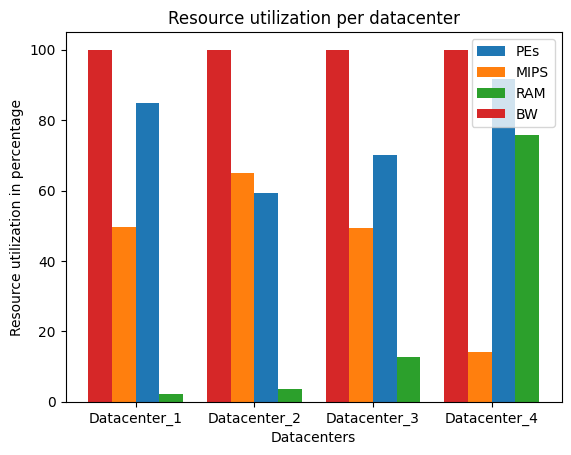

In [2]:
labels = np.unique(dataset['datacenter_name'])
datacenter_totalPEs = np.array([])
datacenter_availablePEs = np.array([])
datacenter_totalMIPS = np.array([])
datacenter_availableMIPS = np.array([])
datacenter_totalRAM = np.array([])
datacenter_availableRAM = np.array([])
datacenter_totalBW = np.array([])
datacenter_availableBW = np.array([])
for i in range(len(labels)):
    totalPEs = 0
    availablePEs = 0
    totalMIPS = 0
    availableMIPS = 0
    totalRAM = 0
    availableRAM = 0
    totalBW = 0
    availableBW = 0
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        totalPEs += sample['number_of_pes']
        availablePEs += sample['available_pes']
        
        totalMIPS += sample['mips']
        availableMIPS += sample['available_mips']
        
        totalRAM += sample['ram']
        availableRAM += sample['available_ram']
        
        totalBW += sample['bw']
        availableBW += sample['available_bw']
    
    datacenter_totalPEs = np.append(datacenter_totalPEs, totalPEs)
    datacenter_availablePEs = np.append(datacenter_availablePEs, availablePEs)
    datacenter_totalMIPS = np.append(datacenter_totalMIPS, totalMIPS)
    datacenter_availableMIPS = np.append(datacenter_availableMIPS, availableMIPS)
    datacenter_totalRAM = np.append(datacenter_totalRAM, totalRAM)
    datacenter_availableRAM = np.append(datacenter_availableRAM, availableRAM)
    datacenter_totalBW = np.append(datacenter_totalBW, totalBW)
    datacenter_availableBW = np.append(datacenter_availableBW, availableBW)

x = np.arange(len(labels))
datacenter_usedPEs = np.subtract(datacenter_totalPEs, datacenter_availablePEs)
datacenter_usedMIPS = np.subtract(datacenter_totalMIPS, datacenter_availableMIPS)
datacenter_usedRAM = np.subtract(datacenter_totalRAM, datacenter_availableRAM)
datacenter_usedBW = np.subtract(datacenter_totalBW, datacenter_availableBW)

bar_width = 0.2
plt.bar(x + bar_width/2, np.divide(datacenter_usedPEs, datacenter_totalPEs)*100, bar_width, label="PEs")
plt.bar(x - bar_width/2, np.divide(datacenter_usedMIPS, datacenter_totalMIPS)*100, bar_width, label="MIPS")
plt.bar(x + bar_width+bar_width/2, np.divide(datacenter_usedRAM, datacenter_totalRAM)*100, bar_width, label="RAM")
plt.bar(x - bar_width-bar_width/2, np.divide(datacenter_usedBW, datacenter_totalBW)*100, bar_width, label="BW")

plt.xticks(x, labels)
plt.xlabel("Datacenters")
plt.ylabel("Resource utilization in percentage")
plt.title("Resource utilization per datacenter")
plt.legend()
plt.show()

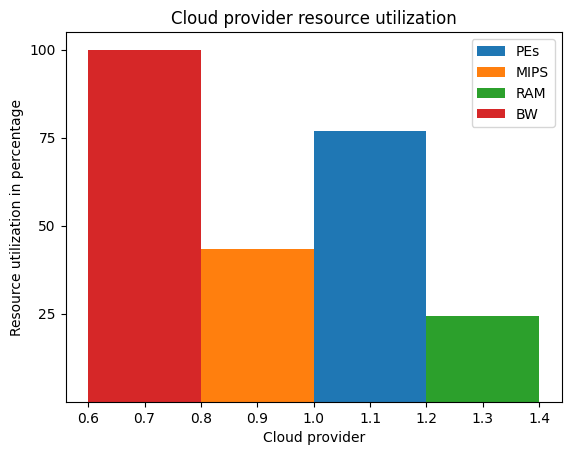

In [3]:
bar_width = 0.2
plt.bar(1 + bar_width/2, np.mean(datacenter_usedPEs)/np.mean(datacenter_totalPEs)*100, bar_width, label="PEs")
plt.bar(1 - bar_width/2, np.mean(datacenter_usedMIPS)/np.mean(datacenter_totalMIPS)*100, bar_width, label="MIPS")
plt.bar(1 + bar_width+bar_width/2, np.mean(datacenter_usedRAM)/np.mean(datacenter_totalRAM)*100, bar_width, label="RAM")
plt.bar(1 - bar_width-bar_width/2, np.mean(datacenter_usedBW)/np.mean(datacenter_totalBW)*100, bar_width, label="BW")

plt.xlabel("Cloud provider")
plt.ylabel("Resource utilization in percentage")
plt.yticks([25,50,75,100])
plt.title("Cloud provider resource utilization")
plt.legend()
plt.show()

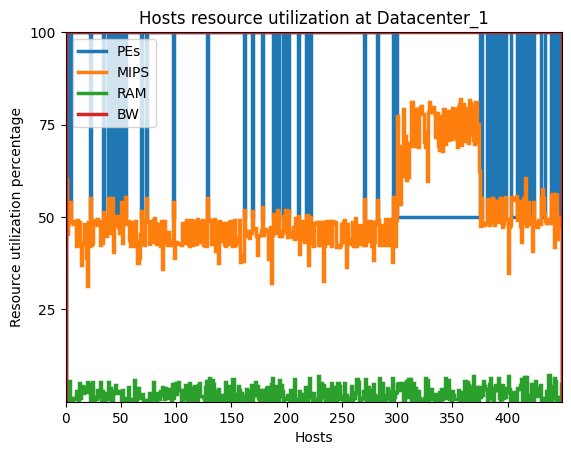

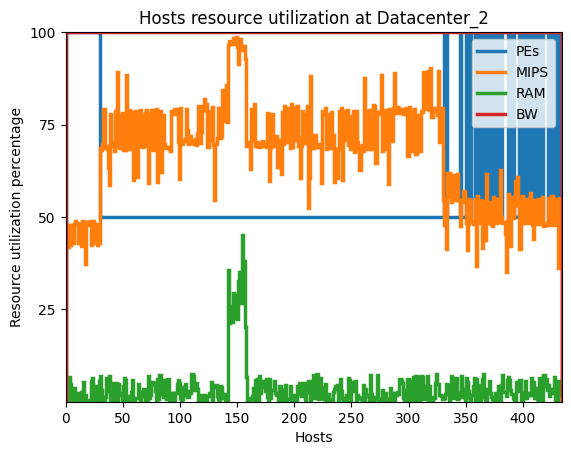

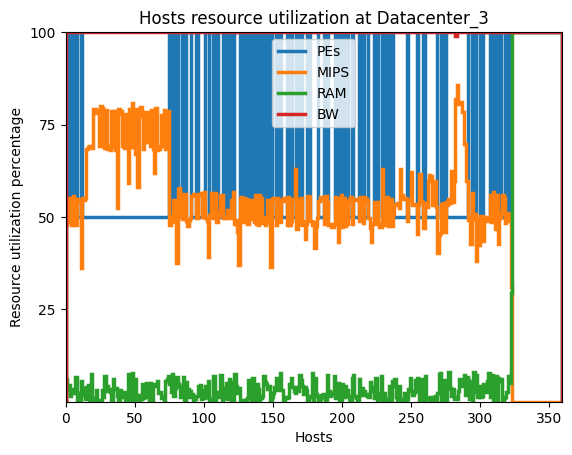

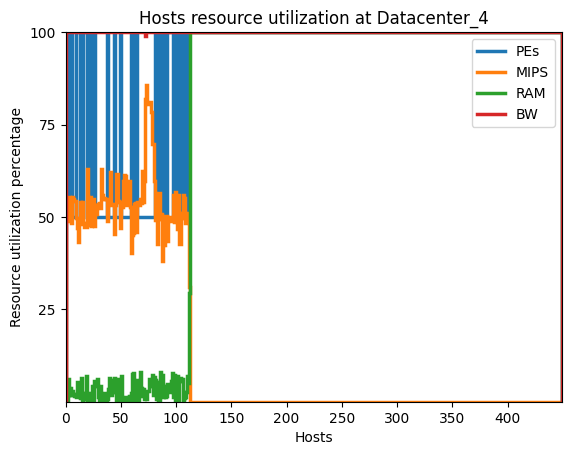

In [4]:
labels = np.unique(dataset['datacenter_name'])

for i in range(len(labels)):
    host_PEs = np.array([])
    host_availablePEs = np.array([])
    host_MIPS = np.array([])
    host_availableMIPS = np.array([])
    host_RAM = np.array([])
    host_availableRAM = np.array([])
    host_BW = np.array([])
    host_availableBW = np.array([])
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        host_PEs = np.append(host_PEs, sample['number_of_pes'])
        host_availablePEs = np.append(host_availablePEs, sample['available_pes'])
        
        host_MIPS = np.append(host_MIPS, sample['mips'])
        host_availableMIPS = np.append(host_availableMIPS, sample['available_mips'])
        
        host_RAM = np.append(host_RAM, sample['ram'])
        host_availableRAM = np.append(host_availableRAM, sample['available_ram'])
        
        host_BW = np.append(host_BW, sample['bw'])
        host_availableBW = np.append(host_availableBW, sample['available_bw'])
        
    fig, ax = plt.subplots()
    ax.stairs(np.divide(np.subtract(host_PEs, host_availablePEs), host_PEs)*100, linewidth=2.5, label="PEs")
    ax.stairs(np.divide(np.subtract(host_MIPS, host_availableMIPS), host_MIPS)*100, linewidth=2.5, label="MIPS")
    ax.stairs(np.divide(np.subtract(host_RAM, host_availableRAM), host_RAM)*100, linewidth=2.5, label="RAM")
    ax.stairs(np.divide(np.subtract(host_BW, host_availableBW), host_BW)*100, linewidth=2.5, label="BW")
    ax.set(xlim=(0, len(host_availablePEs)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Hosts")
    plt.title(f"Hosts resource utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()

In [5]:
print(f"Out of the {np.sum(datacenter_totalPEs)} available CPUs {np.sum(datacenter_totalPEs) - np.sum(datacenter_availablePEs)} are used. (percent: {((np.sum(datacenter_totalPEs) - np.sum(datacenter_availablePEs))/np.sum(datacenter_totalPEs))*100}%)")
print(f"Out of the {np.sum(datacenter_totalMIPS)} available MIPS {np.sum(datacenter_totalMIPS) - np.sum(datacenter_availableMIPS)} are used. (percent: {((np.sum(datacenter_totalMIPS) - np.sum(datacenter_availableMIPS))/np.sum(datacenter_totalMIPS))*100}%)")
print(f"Out of the {np.sum(datacenter_totalRAM)} available RAM {np.sum(datacenter_totalRAM) - np.sum(datacenter_availableRAM)} are used. (percent: {((np.sum(datacenter_totalRAM) - np.sum(datacenter_availableRAM))/np.sum(datacenter_totalRAM))*100}%)")
print(f"Out of the {np.sum(datacenter_totalBW)} available bandwidth {np.sum(datacenter_totalBW) - np.sum(datacenter_availableBW)} are used. (percent: {((np.sum(datacenter_totalBW) - np.sum(datacenter_availableBW))/np.sum(datacenter_totalBW))*100}%)")


Out of the 3382.0 available CPUs 2603.0 are used. (percent: 76.96629213483146%)
Out of the 8412120.0 available MIPS 3647630.4714840613 are used. (percent: 43.36160767421365%)
Out of the 6764000.0 available RAM 1643360.0 are used. (percent: 24.295683027794205%)
Out of the 1691000.0 available bandwidth 1690980.0 are used. (percent: 99.99881726788882%)
